# <span style="color:Maroon">Trade Strategy

__Summary:__ <span style="color:Blue">In this code we shall test the results of given model

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
np.random.seed(0)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# User defined names
index = "S&P500"
filename_whole = "whole_dataset"+index+"_rf_model.csv"
filename_trending = "Trending_dataset"+index+"_rf_model.csv"
filename_meanreverting = "MeanReverting_dataset"+index+"_rf_model.csv"
date_col = "Date"
Rf = 0.01 #Risk free rate of return

In [4]:
# Get current working directory
mycwd = os.getcwd()
print(mycwd)

C:\Users\sidhu\Downloads\Course 10 Capstone Project\Trading Strategy Development\Dev\S&P 500\Codes


In [5]:
# Change to data directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Data")

In [6]:
# Read the datasets
df_whole = pd.read_csv(filename_whole, index_col=date_col)
df_trending = pd.read_csv(filename_trending, index_col=date_col)
df_meanreverting = pd.read_csv(filename_meanreverting, index_col=date_col)
# Convert index to datetime
df_whole.index = pd.to_datetime(df_whole.index)
df_trending.index = pd.to_datetime(df_trending.index)
df_meanreverting.index = pd.to_datetime(df_meanreverting.index)

In [7]:
# Head for whole dataset
df_whole.head()

,Target,Predicted,Adj Close,Open,DVT STD,Sample
Date,,,,,,
2012-08-01,1,1,1375.319946,1379.319946,16.127950,Train
2012-08-02,1,1,1365.000000,1375.130005,16.070596,Train
2012-08-03,0,0,1390.989990,1365.449951,17.494200,Train
2012-08-06,0,0,1394.229980,1391.040039,18.832814,Train
2012-08-07,0,0,1401.349976,1394.459961,19.904058,Train


In [8]:
df_whole.shape

(2119, 6)

In [9]:
# Head for Trending dataset
df_trending.head()

,Target,Predicted,Adj Close,Open,DVT STD,Sample
Date,,,,,,
2012-08-21,0,0,1413.170044,1418.130005,21.170986,Train
2012-08-22,0,0,1413.489990,1413.089966,17.131879,Train
2012-08-24,0,0,1411.130005,1401.989990,14.661186,Train
2012-08-29,1,1,1410.489990,1409.319946,11.832439,Train
2012-08-31,1,1,1406.579956,1400.069946,6.414729,Train


In [10]:
df_trending.shape

(877, 6)

In [11]:
# Head for Mean Reverting dataset
df_meanreverting.head()

,Target,Predicted,Adj Close,Open,DVT STD,Sample
Date,,,,,,
2012-08-01,1,0,1375.319946,1379.319946,16.127950,Train
2012-08-02,1,1,1365.000000,1375.130005,16.070596,Train
2012-08-03,0,0,1390.989990,1365.449951,17.494200,Train
2012-08-06,0,0,1394.229980,1391.040039,18.832814,Train
2012-08-07,0,0,1401.349976,1394.459961,19.904058,Train


In [12]:
df_meanreverting.shape

(1242, 6)

In [13]:
# Merge results from both models to one
df_model = df_trending.append(df_meanreverting)
df_model.sort_index(inplace=True)
df_model.head()

,Target,Predicted,Adj Close,Open,DVT STD,Sample
Date,,,,,,
2012-08-01,1,0,1375.319946,1379.319946,16.127950,Train
2012-08-02,1,1,1365.000000,1375.130005,16.070596,Train
2012-08-03,0,0,1390.989990,1365.449951,17.494200,Train
2012-08-06,0,0,1394.229980,1391.040039,18.832814,Train
2012-08-07,0,0,1401.349976,1394.459961,19.904058,Train


In [14]:
df_model.shape

(2119, 6)

## <span style="color:Maroon">Functions

In [15]:
def initialize(df):
    days, Action1, Action2, current_status, Money, Shares = ([] for i in range(6))
    Open_price = list(df['Open'])
    Close_price = list(df['Adj Close'])
    Predicted = list(df['Predicted'])
    Action1.append(Predicted[0])
    Action2.append(0)
    current_status.append(Predicted[0])
    if(Predicted[0] != 0):
        days.append(1)
        if(Predicted[0] == 1):
            Money.append(0)
        else:
            Money.append(200)
        Shares.append(Predicted[0] * (100/Open_price[0]))
    else:
        days.append(0)
        Money.append(100)
        Shares.append(0)
    return days, Action1, Action2, current_status, Predicted, Money, Shares, Open_price, Close_price

In [16]:
def Action_SA_SA(days, Action1, Action2, current_status, i):
    if(current_status[i-1] != 0):
        days.append(1)
    else:
        days.append(0)
    current_status.append(current_status[i-1])
    Action1.append(0)
    Action2.append(0)
    return days, Action1, Action2, current_status

In [17]:
def Action_ZE_NZE(days, Action1, Action2, current_status, i):
    if(days[i-1] < 5):
        days.append(days[i-1] + 1)
        Action1.append(0)
        Action2.append(0)
        current_status.append(current_status[i-1])
    else:
        days.append(0)
        Action1.append(current_status[i-1] * (-1))
        Action2.append(0)
        current_status.append(0)
    return days, Action1, Action2, current_status

In [18]:
def Action_NZE_ZE(days, Action1, Action2, current_status, Predicted, i):
    current_status.append(Predicted[i])
    Action1.append(Predicted[i])
    Action2.append(0)
    days.append(days[i-1] + 1)
    return days, Action1, Action2, current_status

In [19]:
def Action_NZE_NZE(days, Action1, Action2, current_status, Predicted, i):
    current_status.append(Predicted[i])
    Action1.append(Predicted[i])
    Action2.append(Predicted[i])
    days.append(1)
    return days, Action1, Action2, current_status

In [20]:
def get_df(df, Action1, Action2, days, current_status, Money, Shares):
    df['Action1'] = Action1
    df['Action2'] = Action2
    df['days'] = days
    df['current_status'] =  current_status
    df['Money'] = Money
    df['Shares'] = Shares
    return df

In [21]:
def Get_TradeSignal(Predicted, days, Action1, Action2, current_status):
    # Loop over 1 to N
    for i in range(1, len(Predicted)):
        # When model predicts no action..
        if(Predicted[i] == 0):
            if(current_status[i-1] != 0):
                days, Action1, Action2, current_status = Action_ZE_NZE(days, Action1, Action2, current_status, i)
            else:
                days, Action1, Action2, current_status = Action_SA_SA(days, Action1, Action2, current_status, i)
        # When Model predicts sell
        elif(Predicted[i] == -1):
            if(current_status[i-1] == -1):
                days, Action1, Action2, current_status = Action_SA_SA(days, Action1, Action2, current_status, i)
            elif(current_status[i-1] == 0):
                days, Action1, Action2, current_status = Action_NZE_ZE(days, Action1, Action2, current_status, Predicted,
                                                                       i)
            else:
                days, Action1, Action2, current_status = Action_NZE_NZE(days, Action1, Action2, current_status, Predicted,
                                                                        i)
        # When model predicts Buy
        elif(Predicted[i] == 1):
            if(current_status[i-1] == 1):
                days, Action1, Action2, current_status = Action_SA_SA(days, Action1, Action2, current_status, i)
            elif(current_status[i-1] == 0):
                days, Action1, Action2, current_status = Action_NZE_ZE(days, Action1, Action2, current_status, Predicted,
                                                                       i)
            else:
                days, Action1, Action2, current_status = Action_NZE_NZE(days, Action1, Action2, current_status, Predicted,
                                                                        i)
    return days, Action1, Action2, current_status

In [22]:
def Get_FinancialSignal(Open_price, Action1, Action2, Money, Shares, Close_price):
    for i in range(1, len(Open_price)):
        if(Action1[i] == 0):
            Money.append(Money[i-1])
            Shares.append(Shares[i-1])
        else:
            if(Action2[i] == 0):
                # Enter new position
                if(Shares[i-1] == 0):
                    Shares.append(Action1[i] * (Money[i-1]/Open_price[i]))
                    Money.append(Money[i-1] - Action1[i] * Money[i-1])
                # Exit the current position
                else:
                    Shares.append(0)
                    Money.append(Money[i-1] - Action1[i] * np.abs(Shares[i-1]) * Open_price[i])
            else:
                Money.append(Money[i-1] -1 *Action1[i] *np.abs(Shares[i-1]) * Open_price[i])
                Shares.append(Action2[i] * (Money[i]/Open_price[i]))
                Money[i] = Money[i] - 1 * Action2[i] * np.abs(Shares[i]) * Open_price[i]
    return Money, Shares

In [23]:
def Get_TradeData(df):
    # Initialize the variables
    days,Action1,Action2,current_status,Predicted,Money,Shares,Open_price,Close_price = initialize(df)
    # Get Buy/Sell trade signal
    days, Action1, Action2, current_status = Get_TradeSignal(Predicted, days, Action1, Action2, current_status)
    Money, Shares = Get_FinancialSignal(Open_price, Action1, Action2, Money, Shares, Close_price)
    df = get_df(df, Action1, Action2, days, current_status, Money, Shares)
    df['CurrentVal'] = df['Money'] + df['current_status'] * np.abs(df['Shares']) * df['Adj Close']
    return df

In [24]:
def Print_Fromated_PL(active_days, number_of_trades, drawdown, annual_returns, std_dev, sharpe_ratio, year):
    """
        Prints the metrics
    """
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("                               Year: {0}".format(year))
    print("          Number of Trades Executed: {0}".format(number_of_trades))
    print("Number of days with Active Position: {}".format(active_days))
    print("                      Annual Return: {:.6f} %".format(annual_returns*100))
    print("                       Sharpe Ratio: {:.2f}".format(sharpe_ratio))
    print("     Maximum Drawdown (Daily basis): {:.2f} %".format(drawdown*100))
    print("----------------------------------------------------")
    return

In [25]:
def Get_results_PL_metrics(df, Rf, year):
    df['tmp'] = np.where(df['current_status'] == 0, 0, 1)
    active_days = df['tmp'].sum()
    number_of_trades = np.abs(df['Action1']).sum()+np.abs(df['Action2']).sum()
    df['tmp_max'] = df['CurrentVal'].rolling(window=20).max()
    df['tmp_min'] = df['CurrentVal'].rolling(window=20).min()
    df['tmp'] = np.where(df['tmp_max'] > 0, (df['tmp_max'] - df['tmp_min'])/df['tmp_max'], 0)
    drawdown = df['tmp'].max()
    annual_returns = (df['CurrentVal'].iloc[-1]/100 - 1)
    std_dev = df['CurrentVal'].pct_change(1).std()
    sharpe_ratio = (annual_returns - Rf)/std_dev
    Print_Fromated_PL(active_days, number_of_trades, drawdown, annual_returns, std_dev, sharpe_ratio, year)
    return 

In [26]:
# Change to Images directory
os.chdir("..")
os.chdir(str(os.getcwd()) + "\\Images")

## <span style="color:Maroon">Whole Dataset

In [27]:
df_whole_train = df_whole[df_whole["Sample"] == "Train"]
df_whole_test = df_whole[df_whole["Sample"] == "Test"]
df_whole_test_2019 = df_whole_test[df_whole_test.index.year == 2019]
df_whole_test_2020 = df_whole_test[df_whole_test.index.year == 2020]

In [28]:
output_train_whole = Get_TradeData(df_whole_train)
output_test_whole = Get_TradeData(df_whole_test)
output_test_whole_2019 = Get_TradeData(df_whole_test_2019)
output_test_whole_2020 = Get_TradeData(df_whole_test_2020)
output_train_whole["BuyandHold"] = (100 * output_train_whole["Adj Close"])/(output_train_whole.iloc[0]["Adj Close"])
output_test_whole["BuyandHold"] = (100*output_test_whole["Adj Close"])/(output_test_whole.iloc[0]["Adj Close"])
output_test_whole_2019["BuyandHold"] = (100 * output_test_whole_2019["Adj Close"])/(output_test_whole_2019.iloc[0]
                                                                                    ["Adj Close"])
output_test_whole_2020["BuyandHold"] = (100 * output_test_whole_2020["Adj Close"])/(output_test_whole_2020.iloc[0]
                                                                                    ["Adj Close"])

In [29]:
Get_results_PL_metrics(output_test_whole_2019, Rf, 2019)

++++++++++++++++++++++++++++++++++++++++++++++++++++
                               Year: 2019
          Number of Trades Executed: 26
Number of days with Active Position: 111
                      Annual Return: 6.217746 %
                       Sharpe Ratio: 8.82
     Maximum Drawdown (Daily basis): 6.57 %
----------------------------------------------------


In [30]:
Get_results_PL_metrics(output_test_whole_2020, Rf, 2020)

++++++++++++++++++++++++++++++++++++++++++++++++++++
                               Year: 2020
          Number of Trades Executed: 33
Number of days with Active Position: 123
                      Annual Return: 5.856669 %
                       Sharpe Ratio: 4.54
     Maximum Drawdown (Daily basis): 12.04 %
----------------------------------------------------


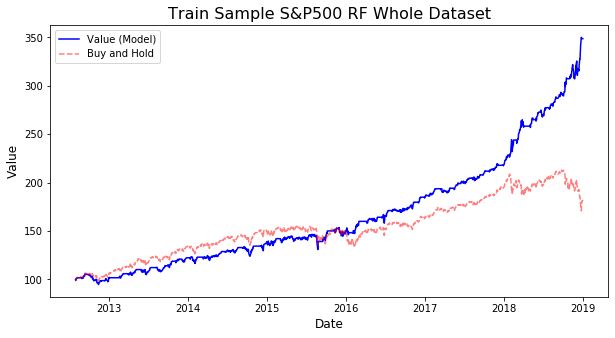

In [31]:
# Scatter plot to save fig
plt.figure(figsize=(10,5))
plt.plot(output_train_whole["CurrentVal"], 'b-', label="Value (Model)")
plt.plot(output_train_whole["BuyandHold"], 'r--', alpha=0.5, label="Buy and Hold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.title("Train Sample "+ str(index) + " RF Whole Dataset", fontsize=16)
plt.savefig("Train Sample Whole Dataset RF Model" + str(index) +'.png')
plt.show()
plt.close()

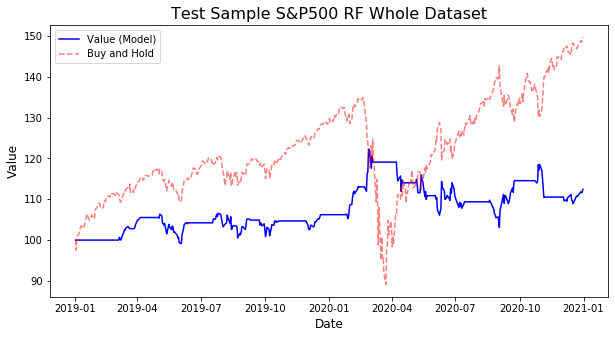

In [32]:
# Scatter plot to save fig
plt.figure(figsize=(10,5))
plt.plot(output_test_whole["CurrentVal"], 'b-', label="Value (Model)")
plt.plot(output_test_whole["BuyandHold"], 'r--', alpha=0.5, label="Buy and Hold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.title("Test Sample "+ str(index) + " RF Whole Dataset", fontsize=16)
plt.savefig("Test Sample Whole Dataset RF Model" + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Blue"> Based on the performance of model on Train Sample, the model has definitely learnt the patter, instead of over-fitting. But the performance of model in Test Sample is very poor

## <span style="color:Maroon">Segment Model

In [33]:
df_model_train = df_model[df_model["Sample"] == "Train"]
df_model_test = df_model[df_model["Sample"] == "Test"]
df_model_test_2019 = df_model_test[df_model_test.index.year == 2019]
df_model_test_2020 = df_model_test[df_model_test.index.year == 2020]

In [34]:
output_train_model = Get_TradeData(df_model_train)
output_test_model = Get_TradeData(df_model_test)
output_test_model_2019 = Get_TradeData(df_model_test_2019)
output_test_model_2020 = Get_TradeData(df_model_test_2020)
output_train_model["BuyandHold"] = (100 * output_train_model["Adj Close"])/(output_train_model.iloc[0]["Adj Close"])
output_test_model["BuyandHold"] = (100 * output_test_model["Adj Close"])/(output_test_model.iloc[0]["Adj Close"])
output_test_model_2019["BuyandHold"] = (100 * output_test_model_2019["Adj Close"])/(output_test_model_2019.iloc[0]
                                                                                    ["Adj Close"])
output_test_model_2020["BuyandHold"] = (100 * output_test_model_2020["Adj Close"])/(output_test_model_2020.iloc[0]
                                                                                    ["Adj Close"])

In [35]:
Get_results_PL_metrics(output_test_model_2019, Rf, 2019)

++++++++++++++++++++++++++++++++++++++++++++++++++++
                               Year: 2019
          Number of Trades Executed: 54
Number of days with Active Position: 141
                      Annual Return: -8.906560 %
                       Sharpe Ratio: -18.06
     Maximum Drawdown (Daily basis): 6.69 %
----------------------------------------------------


In [36]:
Get_results_PL_metrics(output_test_model_2020, Rf, 2020)

++++++++++++++++++++++++++++++++++++++++++++++++++++
                               Year: 2020
          Number of Trades Executed: 33
Number of days with Active Position: 109
                      Annual Return: -0.885378 %
                       Sharpe Ratio: -2.30
     Maximum Drawdown (Daily basis): 12.65 %
----------------------------------------------------


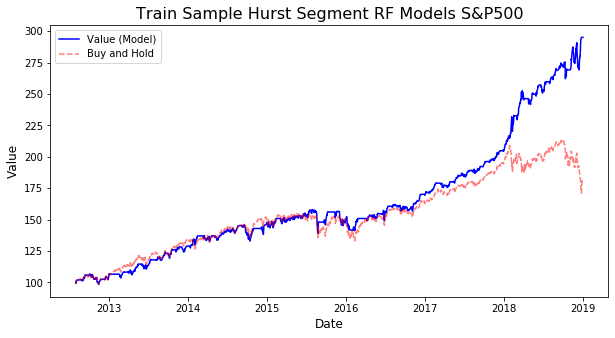

In [37]:
# Scatter plot to save fig
plt.figure(figsize=(10,5))
plt.plot(output_train_model["CurrentVal"], 'b-', label="Value (Model)")
plt.plot(output_train_model["BuyandHold"], 'r--', alpha=0.5, label="Buy and Hold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.title("Train Sample Hurst Segment RF Models "+ str(index), fontsize=16)
plt.savefig("Train Sample Hurst Segment RF Models" + str(index) +'.png')
plt.show()
plt.close()

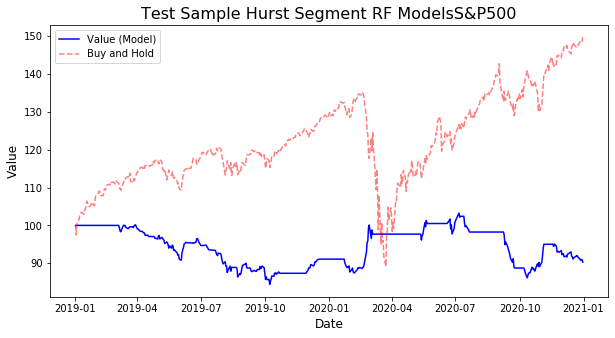

In [38]:
# Scatter plot to save fig
plt.figure(figsize=(10,5))
plt.plot(output_test_model["CurrentVal"], 'b-', label="Value (Model)")
plt.plot(output_test_model["BuyandHold"], 'r--', alpha=0.5, label="Buy and Hold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Value", fontsize=12)
plt.legend()
plt.title("Test Sample Hurst Segment RF Models" + str(index), fontsize=16)
plt.savefig("Test Sample Hurst Segment RF Models" + str(index) +'.png')
plt.show()
plt.close()

__Comments:__ <span style="color:Blue"> Based on the performance of model on Train Sample, the model has definitely learnt the patter, instead of over-fitting. The model does perform well in Test sample (Not compared to Buy and Hold strategy) compared to single model. Hurst Exponent based segmentation has definately added value to the model